# **<center>Курсовой проект по теме "Библиотеки Python для DataScience, продолжение"</center>**<hr>

## Оглавление

1. [Импорт необходимых библиотек и файлов](#import_libs)
2. [EDA, заполнение пропусков, обработка выбросов](#eda_fillna)
    * [Описание датасета](#description_ds)
    * [Home Ownership](#home_ownership)
    * [Annual Income](#annual_income)
    * [Years in current job](#years_in_current_job)
    * [Tax Liens](#tax_liens)
    * [Number of Open Accounts](#number_of_open_accounts)
    * [Years of Credit History](#years_of_credit_history)
    * [Maximum Open Credit](#maximum_open_credit)
    * [Number of Credit Problems](#numbers_of_credit_problems)
    * [Months since last delinquent](#months_since_last_delinquent)
    * [Bankruptcies](#bankruptcies)
    * [Purpose](#purpose)
    * [Term](#term)
    * [Current Loan Amount](#current_loan_amount)
    * [Current Credit Balance](#current_credit_balance)
    * [Monthly Debt](#monthly_debt)
    * [Credit Score](#credit_score)
3. [Генерация новых признаков](#add_new_features)
    * [Debt Percentage](#debt_percent)
    * [Have Problem](#have_problems)
    * [Income to median](#income_to_median)
    * [Credit score to median](#credit_score_to_median)
    * [Tax Liens bin](#tax_liens_bin)
4. [Анализ данных и проверка статистических гипотез](#check_data)
    * [Корреляция с целевой переменной, матрица корреляций](#target_correlation)
    * [Объединение категорий в признаке Years in current job](#join_years)
    * [Объединение категорий в признаке Purpose](#join_purpose)
5. [Создание методов, классов и функций](#make_classes)
6. [Сравнение распределений на тестовой и на тренировочных выборках](#train_vs_test)
7. [Доверительные интервалы](#trusted)
8. [Обучение и сохранение модели](#teach_model)


## <a id='import_libs'>**1. Импорт необходимых библиотек и файлов**</a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pathlib import Path
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from scipy.stats import chi2_contingency, mannwhitneyu

import catboost as catb

In [2]:
ROOT = Path('/home/maxim/Документы/GeekBrains/2 четверть. Библиотеки Python для Data Science: продолжение/Tasks/course_project/')

train_dir = ROOT / 'course_project_train.csv'
test_dir = ROOT / 'course_project_test.csv'

In [3]:
df_firstview = pd.read_csv(train_dir)

## <a id='eda_fillna'>**2. EDA, заполнение пропусков, обработка выбросов**</a>

<a id='description_ds'>**Описание датасета**</a>

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

In [4]:
df_firstview.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [5]:
df_firstview.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [6]:
df_firstview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

#### Из первичного обзора можно вынести то, что некоторые характеристики имеют пропуски, а выборки местами сильно несбалансированы. Теперь посмотрим на датасет более подробно.

### <a id='home_ownership'>**Home Ownership**</a> - домовладение

In [7]:
df_firstview['Home Ownership'].value_counts()

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

#### Значения Home Mortgage и Have Mortgage по сути являются одним и тем же, можно их объединить.

In [8]:
df_firstview.loc[(df_firstview['Home Ownership'] == 'Have Mortgage'), 'Home Ownership'] = 'Home Mortgage'

#### Поменяем текстовые значения на цифры.

In [9]:
home_ownership_to_numbers = {
    x: y 
    for x, y in zip(
        list(df_firstview['Home Ownership'].unique()), 
        range(len(list(df_firstview['Home Ownership'].unique())))
    )
}

df_firstview['Home Ownership'] = df_firstview['Home Ownership'].replace(home_ownership_to_numbers)

### <a id='annual_income'>**Annual Income**</a> - годовой доход

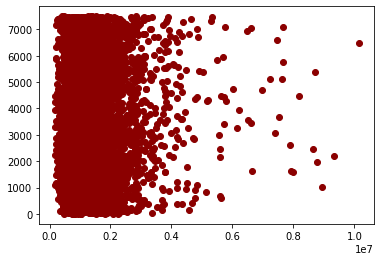

In [10]:
plt.scatter(df_firstview['Annual Income'], [x for x in range(len(df_firstview['Annual Income']))], color='darkred')

#### Данные выглядят довольно правдоподобно, несмотря на отдельные довольно большие значения. Просто заполним пропуски медианными значениями.

In [11]:
df_firstview['Annual Income'] = df_firstview['Annual Income'].fillna(df_firstview['Annual Income'].median())

### <a id='years_in_current_job'>**Years in current job**</a> - количество лет на текущем месте работы

In [12]:
df_firstview['Years in current job'].value_counts()

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

#### Поменяем текстовые значения на цифры.

In [13]:
years_to_numbers = {
    x: y 
    for x, y in zip(
        list(df_firstview['Years in current job'].dropna().unique()), 
        [10, 8, 6, 7, 5, 1, 0, 4, 3, 2, 9]
    )
}

df_firstview['Years in current job'] = df_firstview['Years in current job'].replace(years_to_numbers)

#### Пропуски заменим медианными значениями

In [14]:
df_firstview['Years in current job'] = df_firstview['Years in current job'].fillna(df_firstview['Years in current job'].median())

## <a id='tax_liens'>**Tax Liens**</a> - налоговые обременения

In [15]:
df_firstview['Tax Liens'].value_counts()

0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
5.0       2
6.0       2
7.0       1
Name: Tax Liens, dtype: int64

## <a id='number_of_open_accounts'>**Number of Open Accounts**</a> - количество открытых счетов

<AxesSubplot:>

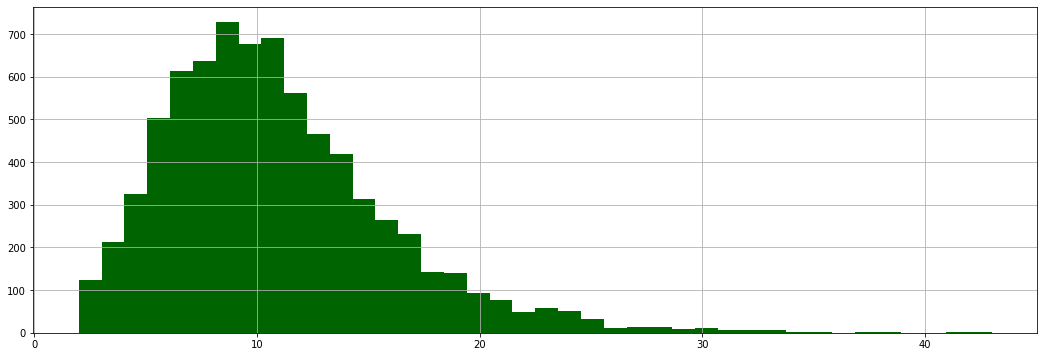

In [16]:
df_firstview['Number of Open Accounts'].hist(figsize=(18, 6), bins=40, color='darkgreen')

#### Выглядит странным одновременное владение аж 30, а тем более 40 и более счетами одним человеком. Обрежем данные до 30.

In [17]:
df_firstview.loc[(df_firstview['Number of Open Accounts'] > 30), 'Number of Open Accounts'] = df_firstview['Number of Open Accounts'].median()

## <a id='years_of_credit_history'>**Years of Credit History**</a> - количество лет кредитной истории

<AxesSubplot:>

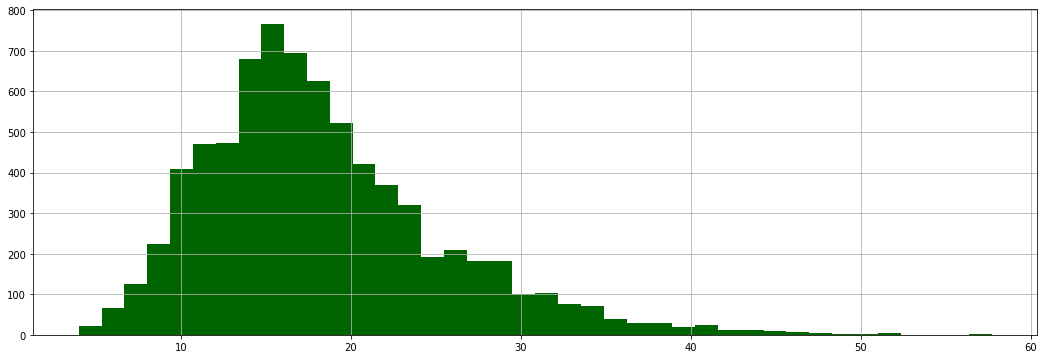

In [18]:
df_firstview['Years of Credit History'].hist(figsize=(18, 6), bins=40, color='darkgreen')

#### На первый взгляд данные можно не трогать.

## <a id='maximum_open_credit'>**Maximum Open Credit**</a> - наибольший открытый кредит

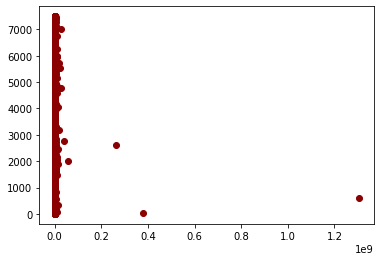

In [19]:
plt.scatter(df_firstview['Maximum Open Credit'], [x for x in range(len(df_firstview['Maximum Open Credit']))], color='darkred')

#### Уберем значения, которые, скорее всего, являются выбросами. Заменим их на медианные.

In [20]:
df_firstview.loc[(df_firstview['Maximum Open Credit'] > 2500000), 'Maximum Open Credit'] = df_firstview['Maximum Open Credit'].median()

## <a id='numbers_of_credit_problems'>**Number of Credit Problems**</a> - количество проблем с кредитом

In [21]:
df_firstview['Number of Credit Problems'].value_counts()

0.0    6469
1.0     882
2.0      93
3.0      35
4.0       9
5.0       7
6.0       4
7.0       1
Name: Number of Credit Problems, dtype: int64

#### На первый взгляд данные в обработке не нуждаются.

## <a id='months_since_last_delinquent'>**Months since last delinquent**</a> - количество месяцев с последней просрочки платежа

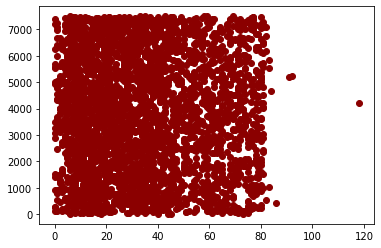

In [22]:
plt.scatter(df_firstview['Months since last delinquent'], [x for x in range(len(df_firstview['Months since last delinquent']))], color='darkred')

#### Обработаем явный выброс. Всё, что больше 85 приравняем 85.

In [23]:
df_firstview.loc[(df_firstview['Months since last delinquent'] > 85), 'Months since last delinquent'] = 85

#### Очень много пропущенных данных. Сделаем предположение, что данные не были заполнены, потому что просрочек по платежам не было, поэтому можем приравнять пропущенные значения нулю.

In [24]:
df_firstview['Months since last delinquent'] = df_firstview['Months since last delinquent'].fillna(0)

## <a id='bankruptcies'>**Bankruptcies**</a> - банкротства

In [25]:
df_firstview['Bankruptcies'].value_counts()

0.0    6660
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

#### Предположим, что незаполненные значения означают отсутствие банкротств, поэтому заполним их нулями.

In [26]:
df_firstview['Bankruptcies'] = df_firstview['Bankruptcies'].fillna(0)

## <a id='purpose'>**Purpose**</a> - цель кредита

In [27]:
df_firstview['Purpose'].value_counts()

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

#### Поменяем текстовые значения на цифры.

In [28]:
purpose_to_numbers = {
    x: y 
    for x, y in zip(
        list(df_firstview['Purpose'].unique()), 
        range(len(list(df_firstview['Purpose'].unique())))
    )
}

df_firstview['Purpose'] = df_firstview['Purpose'].replace(purpose_to_numbers)

## <a id='term'>**Term**</a> - срок кредита

In [29]:
df_firstview['Term'].value_counts()

Short Term    5556
Long Term     1944
Name: Term, dtype: int64

In [30]:
term_to_numbers = {
    x: y 
    for x, y in zip(
        list(df_firstview['Term'].unique()), 
        range(len(list(df_firstview['Term'].unique())))
    )
}

df_firstview['Term'] = df_firstview['Term'].replace(term_to_numbers)

## <a id='current_loan_amount'>**Current Loan Amount**</a> - текущая сумма кредита

<AxesSubplot:>

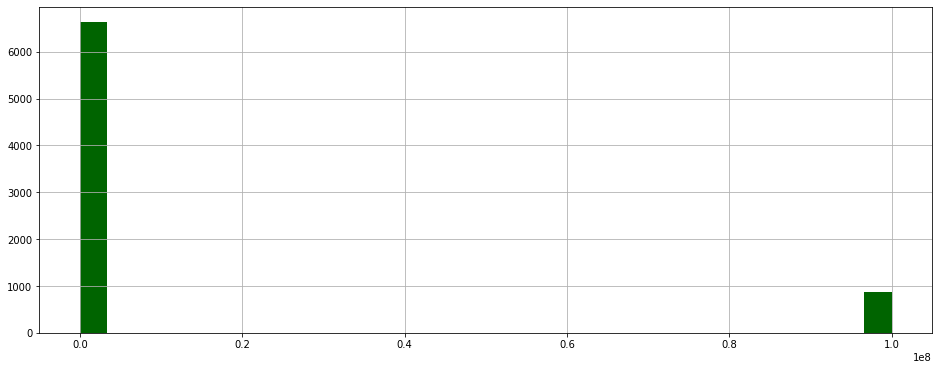

In [31]:
df_firstview['Current Loan Amount'].hist(figsize=(16, 6), color='darkgreen', bins=30)

#### Огромное количество значений, которые были заполнены некачественно. Скорее всего просто взяли максимальное число, которое позволяла ввести программа. Приравняем эти значения медиане.

In [32]:
df_firstview['Current Loan Amount'].value_counts()

99999999.0    870
89298.0         6
218064.0        6
216106.0        5
270226.0        5
             ... 
490006.0        1
404756.0        1
194414.0        1
420376.0        1
33792.0         1
Name: Current Loan Amount, Length: 5386, dtype: int64

In [33]:
df_firstview.loc[(df_firstview['Current Loan Amount'] == 99999999.0), 'Current Loan Amount'] = df_firstview['Current Loan Amount'].median()

## <a id='current_credit_balance'>**Current Credit Balance**</a> - текущий кредитный баланс

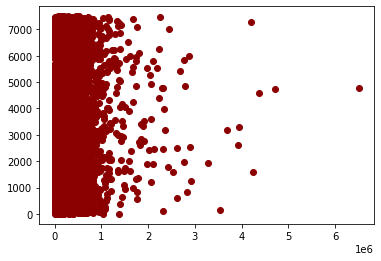

In [34]:
plt.scatter(df_firstview['Current Credit Balance'], [x for x in range(len(df_firstview['Current Credit Balance']))], color='darkred')

#### Значения выглядят реалистично, ничего менять не будем.

## <a id='monthly_debt'>**Monthly Debt**</a> - ежемесячный долг

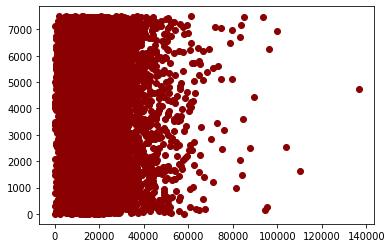

In [35]:
plt.scatter(df_firstview['Monthly Debt'], [x for x in range(len(df_firstview['Monthly Debt']))], color='darkred')

## <a id='credit_score'>**Credit Score**</a> - Кредитный рейтинг

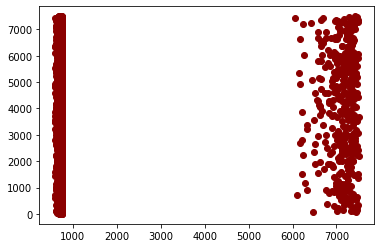

In [36]:
plt.scatter(df_firstview['Credit Score'], [x for x in range(len(df_firstview['Credit Score']))], color='darkred')

#### Кредитный рейтинг являет собой значение от 0 до 999. Следовательно, отметки в 6 и 7 тысяч - необходимо поделить на 10.

In [37]:
df_firstview.loc[(df_firstview['Credit Score'] > 999), 'Credit Score'] = (df_firstview['Credit Score'] / 10)

#### Заполним пропущенные значения медианными.

In [38]:
df_firstview['Credit Score'] = df_firstview['Credit Score'].fillna(df_firstview['Credit Score'].median())

In [39]:
df_firstview.isna().sum()

Home Ownership                  0
Annual Income                   0
Years in current job            0
Tax Liens                       0
Number of Open Accounts         0
Years of Credit History         0
Maximum Open Credit             0
Number of Credit Problems       0
Months since last delinquent    0
Bankruptcies                    0
Purpose                         0
Term                            0
Current Loan Amount             0
Current Credit Balance          0
Monthly Debt                    0
Credit Score                    0
Credit Default                  0
dtype: int64

## <a id='add_new_features'>**3. Генерация новых признаков**</a>

## <a id='debt_percent'>**Debt Percentage**</a> - какая часть денег уходит на погашение ежемесячных платежей

In [40]:
df_firstview['Debt Percentage'] = df_firstview['Monthly Debt'] / (df_firstview['Annual Income'] / 12)

## <a id='have_problems'>**Have problem**</a> - если у человека были хоть раз трудности с погашением или банкротство

In [41]:
df_firstview['Have problem'] = 0
df_firstview['Have problem'] = np.where(((df_firstview['Bankruptcies'] > 0) | (df_firstview['Number of Credit Problems'] > 0)), 1, df_firstview['Have problem'])

## <a id='income_to_median'>**Income to median**</a> - доход выше/ниже среднего

In [42]:
df_firstview['Income to median'] = 0
df_firstview.loc[(df_firstview['Annual Income'] > df_firstview['Annual Income'].median()), 'Income to median'] = 1

## <a id='credit_score_to_median'>**Credit Score to median**</a> - кредитный рейтинг выше/ниже среднего

In [43]:
df_firstview['Credit score to median'] = 0
df_firstview.loc[(df_firstview['Credit Score'] > df_firstview['Credit Score'].median()), 'Credit score to median'] = 1

## <a id='tax_liens_bin'>**Tax Liens bin**</a> - есть ли у человека налоговые обременения

In [44]:
df_firstview['Tax Liens bin'] = 0
df_firstview.loc[(df_firstview['Tax Liens'] > 0), 'Tax Liens bin'] = 1

## <a id='check_data'>**4. Анализ данных и проверка статистических гипотез**</a>

## <a id='target_correlation'>**Корреляция с целевой переменной, матрица корреляций**</a>

In [45]:
target_name = 'Credit Default'
cb_features = ['Home Ownership',
 'Annual Income',
 'Years in current job',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Purpose',
 'Term',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score',
 'Tax Liens bin',
 'Debt Percentage',
 'Have problem',
 'Income to median',
 'Credit score to median']

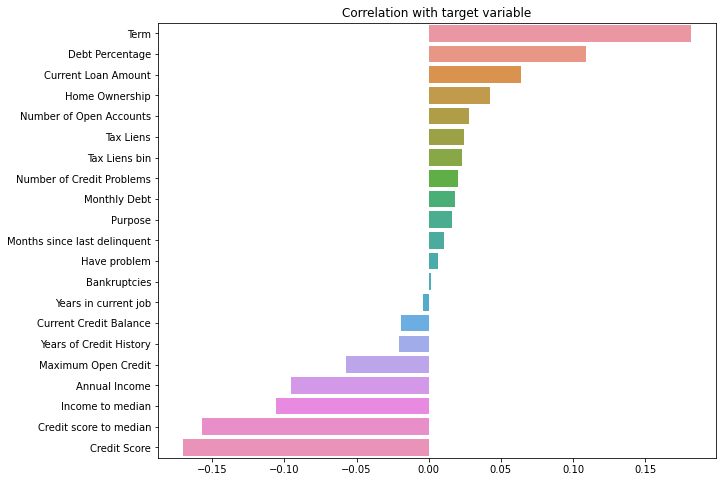

In [46]:
corr_with_target = df_firstview[cb_features + [target_name]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

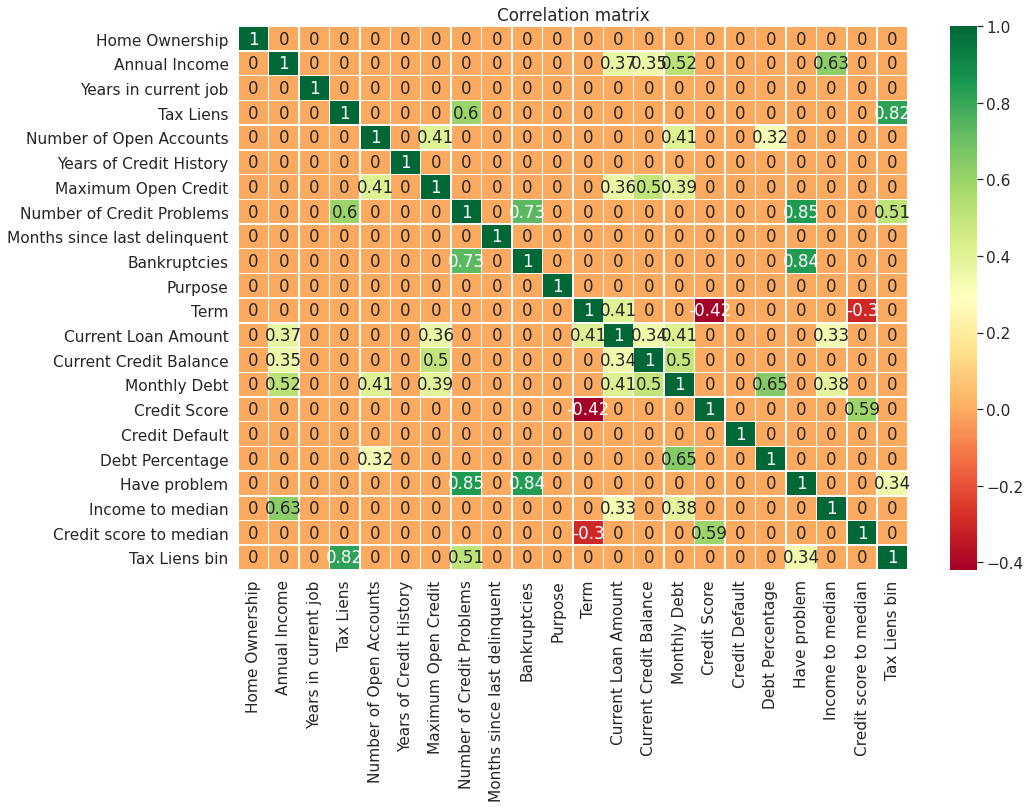

In [47]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = df_firstview.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='RdYlGn')

plt.title('Correlation matrix')
plt.show()

#### Признак Have problem имеет значительную корреляцию с признаками Bankruptcies и Number of Credit Problems. Можем его убрать из основных фичей.

## <a id='join_years'>**Объединение категорий в признаке Years in current job**</a>

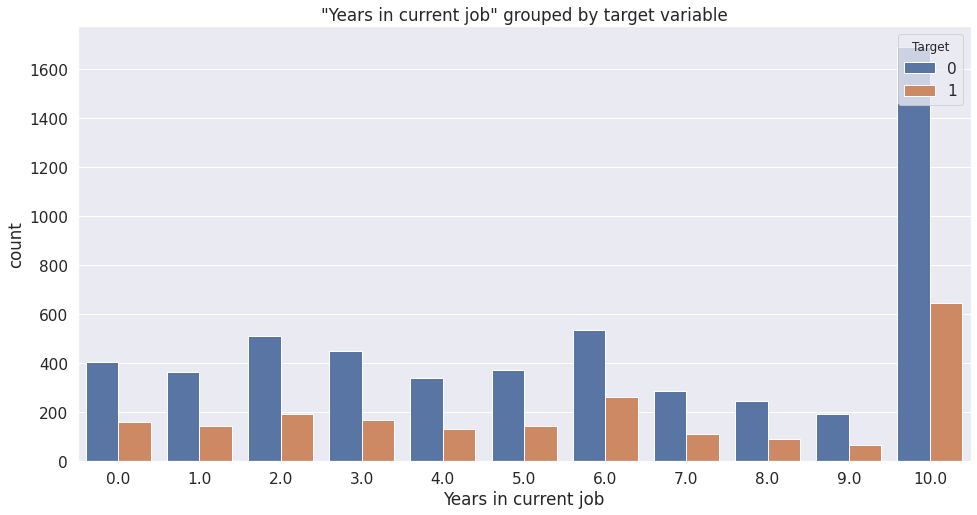

In [48]:
plt.figure(figsize=(16, 8))

sns.countplot(x='Years in current job', hue=target_name, data=df_firstview)
plt.title(f'"Years in current job" grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

**Наблюдение**

Взглянем на график параметра Years in current job. По графику видно, что некоторые значения признака имеют схожие доли в разрезе целевой переменной. Если это действительно так, то можно будет объединить некоторые в одну категорию.

**Гипотеза** 

* Нулевая гипотеза: ожидаемые и наблюдаемые частоты согласованы
* Альтернативная гипотеза: отклонения в частотах выходят за рамки случайных колебаний, расхождения статистически значимы
* Критерий: Хи-квадрат Пирсона
* Уровень значимости $\normalsize \alpha$: 0.05
* Критическая область: двухсторонняя

Для проверки данной гипотезы необходимо по очереди подать наблюдаемые частоты категорий признака Years in current job в выбранный критерий, после чего оценить значение достигаемого уровня значимости p-value и сравнить с его с выбранным порогом альфа, если p-value получится больше выбранного порога, то гипотезу о согласованности частот можно не отбрасывать и объединить категории.

In [49]:
df_firstview['Id'] = df_firstview.index

def join_years(*args):
    years_and_target = df_firstview.loc[df_firstview['Years in current job'].isin([*args]), ['Id', 'Years in current job', 'Credit Default']]
    table = years_and_target.pivot_table(values='Id', index='Years in current job', columns='Credit Default', aggfunc='count')

    chi2, p, _, _ = chi2_contingency(table)
    
    return print(p)

In [50]:
join_years(0, 1, 2, 3, 4, 5)

0.9988474350696503


#### Как видно, мы можем спокойно объединить категории 0, 1, 2, 3, 4 и 5.

In [51]:
join_years(6, 7, 8)

0.08925924853776145


#### Довольно низкие показатели P-value у шестой категории в отношении к остальным. Вероятно, по причине того, что мы заполняли пропуски медианным значениями. Однако, категории 6, 7 и 8 проходят по указанному нами критерию, поэтому их тоже объединим.

In [52]:
join_years(9, 10)

0.4299373704294749


#### Также объединим 9 и 10 категорию.

## <a id='join_purpose'>**Объединение категорий в признаке Purpose**</a>

#### Проверим еще один признак - Purpose.

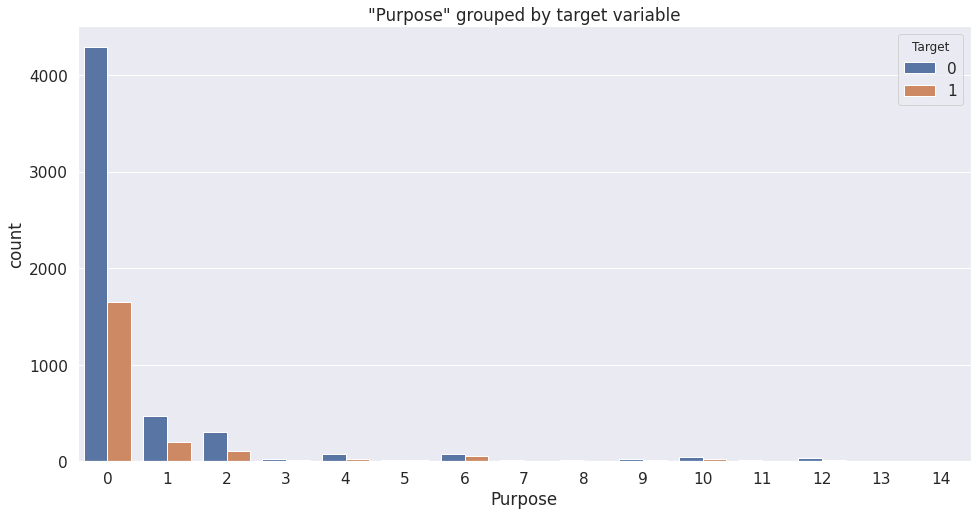

In [53]:
plt.figure(figsize=(16, 8))

sns.countplot(x='Purpose', hue=target_name, data=df_firstview)
plt.title(f'"Purpose" grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

In [54]:
def join_purpose(*args):
    years_and_target = df_firstview.loc[df_firstview['Purpose'].isin([*args]), ['Id', 'Purpose', 'Credit Default']]
    table = years_and_target.pivot_table(values='Id', index='Purpose', columns='Credit Default', aggfunc='count')

    chi2, p, _, _ = chi2_contingency(table)
    
    return print(p)

In [55]:
join_purpose(0, 1, 2, 3, 4)

0.7371943297302938


In [56]:
join_purpose(5, 6)

0.40483403834216203


In [57]:
join_purpose(7, 8, 9, 10, 11, 12, 13)

0.8251767813839385


#### Объединим 13 категорий и сделаем 3. По указанным выше группам.

## <a id='make_classes'>**5. Создание методов, классов и функций**</a>

In [58]:
df_train = pd.read_csv(train_dir)
df_test = pd.read_csv(test_dir)

In [59]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [60]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [61]:
def evaluate_preds(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

In [62]:
def show_feature_importances(feature_names, feature_importances, get_top=None):
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    feature_importances = feature_importances.sort_values('importance', ascending=False)
       
    plt.figure(figsize = (20, len(feature_importances) * 0.355))
    
    sns.barplot(feature_importances['importance'], feature_importances['feature'])
    
    plt.xlabel('Importance')
    plt.title('Importance of features')
    plt.show()
    
    if get_top is not None:
        return feature_importances['feature'][:get_top].tolist()

In [63]:
class CreditScoring:
    
    
    def __init__(self):
        
        """Параметры класса"""
        
        self.annual_income_median = None
        self.years_in_current_job_median = None
        self.maximum_open_credit_median = None
        self.current_loan_amount_median = None
        self.credit_score_median = None
        self.number_of_open_accounts_median = None
    
    
    def fit(self, df):
        
        """Статистические переменные"""
        
        self.annual_income_median = df['Annual Income'].median()
        self.years_in_current_job_median = df['Years in current job'].median()
        self.maximum_open_credit_median = df['Maximum Open Credit'].median()
        self.current_loan_amount_median = df['Current Loan Amount'].median()
        self.credit_score_median = df['Credit Score'].median()
        self.number_of_open_accounts_median = df['Number of Open Accounts'].median()

        
    def convert_to_nums(self, df):
        
        """Преобразуем текст в числовые значения"""
        
        # Home ownership
        df.loc[(df['Home Ownership'] == 'Have Mortgage'), 'Home Ownership'] = 'Home Mortgage'
        home_ownership_to_numbers = {
            x: y 
            for x, y in zip(
                list(df['Home Ownership'].unique()), 
                range(len(list(df['Home Ownership'].unique())))
                )
            }

        df['Home Ownership'] = df['Home Ownership'].replace(home_ownership_to_numbers)
        
        # Years in current job
        years_to_numbers = {
        '10+ years': 10, 
        '3 years': 3,
        '2 years': 2,
        '< 1 year': 0,
        '5 years': 5, 
        '1 year': 1,
        '4 years': 4, 
        '7 years': 7, 
        '6 years': 6, 
        '8 years': 8, 
        '9 years': 9
        }

        df['Years in current job'] = df['Years in current job'].replace(years_to_numbers)
        
        # Purpose
        purpose_to_numbers = {
            x: y 
            for x, y in zip(
                list(df['Purpose'].unique()), 
                range(len(list(df['Purpose'].unique())))
            )
        }

        df['Purpose'] = df['Purpose'].replace(purpose_to_numbers)
        
        # Term
        term_to_numbers = {
            x: y 
            for x, y in zip(
                list(df['Term'].unique()), 
                range(len(list(df['Term'].unique())))
            )
        }

        df['Term'] = df['Term'].replace(term_to_numbers)
        
        return df
        
    def transform(self, df):
        
        """Преобразование данных"""
                        
        # Annual Income
        df['Annual Income'] = df['Annual Income'].fillna(self.annual_income_median)
        
        # Years in current job
        df['Years in current job'] = df['Years in current job'].fillna(self.years_in_current_job_median)
        df.loc[(df['Years in current job'].isin([0, 1, 2, 3, 4, 5])), 'Years in current job'] = 0
        df.loc[(df['Years in current job'].isin([6, 7, 8])), 'Years in current job'] = 1
        df.loc[(df['Years in current job'].isin([9, 10])), 'Years in current job'] = 2
                
        # Number of Open Accounts
        df.loc[(df['Number of Open Accounts'] > 30), 'Number of Open Accounts'] = self.number_of_open_accounts_median
        
        # Maximum Open Credit
        df.loc[(df['Maximum Open Credit'] > 2500000), 'Maximum Open Credit'] = df['Maximum Open Credit'].median()
        
        # Months since last delinquent
        df.loc[(df['Months since last delinquent'] > 85), 'Months since last delinquent'] = 85
        df['Months since last delinquent'] = df['Months since last delinquent'].fillna(0)
        
        # Bankruptcies
        df['Bankruptcies'] = df['Bankruptcies'].fillna(0)
        
        # Current Loan Amount
        df.loc[(df['Current Loan Amount'] == 99999999.0), 'Current Loan Amount'] = self.current_loan_amount_median
        
        # Credit Score
        df['Credit Score'] = df['Credit Score'].fillna(self.credit_score_median)
        df.loc[df['Credit Score'] > 999, 'Credit Score'] = df['Credit Score'] // 10
        
        # Obj to Float
        data_to_change_type = df.select_dtypes(include='object').keys()
        for column in data_to_change_type:
            df[column] = df[column].astype(float)
        
        # Purpose
        df.loc[(df['Purpose'].isin([0, 1, 2, 3, 4])), 'Purpose'] = 0
        df.loc[(df['Purpose'].isin([5, 6])), 'Purpose'] = 1
        df.loc[(df['Purpose'].isin([7, 8, 9, 10, 11, 12, 13])), 'Purpose'] = 2
        
        return df
    
    def add_features(self, df):
        
        """Добавление новых признаков"""
        
        # Tax Liens bin
        df['Tax Liens bin'] = 0
        df.loc[(df['Tax Liens'] > 0), 'Tax Liens bin'] = 1
        
        # Debt Percentage
        df['Debt Percentage'] = df['Monthly Debt'] / (df['Annual Income'] / 12)
        
        # Have Problem
        df['Have problem'] = 0
        df['Have problem'] = np.where(((df['Bankruptcies'] > 0) | (df['Number of Credit Problems'] > 0)), 1, df['Have problem'])

        # Income to median
        df['Income to median'] = 0
        df.loc[(df['Annual Income'] > self.annual_income_median), 'Income to median'] = 1
        
        # Credit score to median
        df['Credit score to median'] = 0
        df.loc[(df['Credit Score'] > self.credit_score_median), 'Credit score to median'] = 1
        
        return df

## <a id='train_vs_test'>**6. Сравнение распределений на тестовой и на тренировочных выборках**</a>

#### Применим класс к датасетам

In [64]:
credit_scoring = CreditScoring()
df_train = credit_scoring.convert_to_nums(df_train)
credit_scoring.fit(df_train)
df_train = credit_scoring.transform(df_train)
df_train = credit_scoring.add_features(df_train)
reduce_mem_usage(df_train)
df_test = credit_scoring.convert_to_nums(df_test)
df_test = credit_scoring.transform(df_test)
df_test = credit_scoring.add_features(df_test)
reduce_mem_usage(df_test)

Memory usage of dataframe is 1.26 MB
Memory usage after optimization is: 0.46 MB
Decreased by 63.6%
Memory usage of dataframe is 0.40 MB
Memory usage after optimization is: 0.15 MB
Decreased by 62.5%


,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,...,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Tax Liens bin,Debt Percentage,Have problem,Income to median,Credit score to median
0,0,1168386.0,0.0,0.0,9.0,12.500000,220968.0,0.0,70.0,0.0,...,0,162470.0,105906.0,6813.0,731.0,0,0.069973,0,0,0
1,0,231838.0,0.0,0.0,6.0,32.700001,55946.0,0.0,8.0,0.0,...,0,78298.0,46037.0,2318.0,699.0,0,0.119980,0,0,0
2,1,1152540.0,0.0,0.0,10.0,13.700000,204600.0,0.0,0.0,0.0,...,0,200178.0,146490.0,18729.0,726.0,0,0.195002,0,0,0
3,1,1220313.0,2.0,0.0,16.0,17.000000,456302.0,0.0,70.0,0.0,...,0,217382.0,213199.0,27559.0,739.0,0,0.271003,0,1,1
4,1,2340952.0,1.0,0.0,11.0,23.600000,1207272.0,0.0,0.0,0.0,...,1,777634.0,425391.0,42605.0,706.0,0,0.218398,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1,1020053.0,2.0,0.0,14.0,29.100000,559152.0,1.0,68.0,1.0,...,0,309573.0,162735.0,15046.0,745.0,0,0.177003,1,0,1
2496,1,1168386.0,0.0,0.0,15.0,17.000000,1737780.0,0.0,77.0,0.0,...,0,468512.0,1439269.0,32996.0,731.0,0,0.338888,0,0,0
2497,1,1171806.0,0.0,0.0,10.0,12.800000,1706430.0,0.0,0.0,0.0,...,0,430496.0,676438.0,36912.0,695.0,0,0.378001,0,1,0
2498,0,723520.0,2.0,0.0,14.0,28.799999,945780.0,0.0,0.0,0.0,...,0,257774.0,391248.0,13506.0,744.0,0,0.224005,0,0,1


In [65]:
target_name = 'Credit Default'
cb_features = ['Home Ownership',
               'Annual Income',
               'Years in current job',
               'Tax Liens',
               'Number of Open Accounts',
               'Years of Credit History',
               'Maximum Open Credit',
               'Number of Credit Problems',
               'Months since last delinquent',
               'Bankruptcies',
               'Purpose',
               'Term',
               'Current Loan Amount',
               'Current Credit Balance',
               'Monthly Debt',
               'Credit Score',
               'Tax Liens bin',
               'Debt Percentage',
               'Have problem',
               'Income to median',
               'Credit score to median']
cat_features = ['Home Ownership',
                'Years in current job',
                'Tax Liens',
                'Number of Credit Problems',
                'Bankruptcies',
                'Purpose',
                'Term',
                'Tax Liens bin',
                'Have problem',
                'Income to median',
                'Credit score to median']
num_features = ['Annual Income',
                'Number of Open Accounts',
                'Years of Credit History',
                'Maximum Open Credit',
                'Months since last delinquent',
                'Current Loan Amount',
                'Current Credit Balance',
                'Monthly Debt',
                'Credit Score']

Annual Income
MannwhitneyuResult(statistic=9361624.5, pvalue=0.45720685796373933)


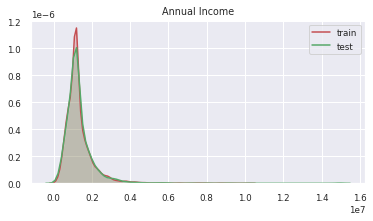

Number of Open Accounts
MannwhitneyuResult(statistic=9266775.5, pvalue=0.19270945160072184)


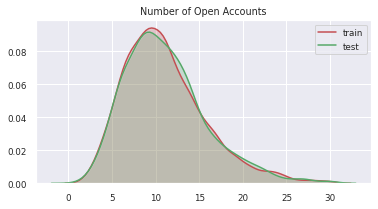

Years of Credit History
MannwhitneyuResult(statistic=9339658.0, pvalue=0.3886945952485082)


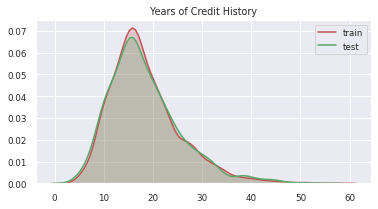

Maximum Open Credit
MannwhitneyuResult(statistic=9356079.5, pvalue=0.43984874650828065)


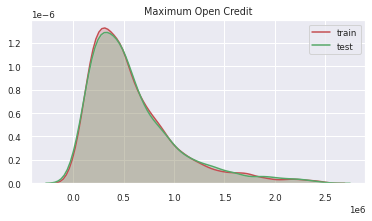

Months since last delinquent
MannwhitneyuResult(statistic=9346198.5, pvalue=0.40057108735746316)


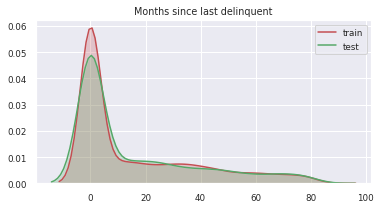

Current Loan Amount
MannwhitneyuResult(statistic=9221649.5, pvalue=0.10977704624662077)


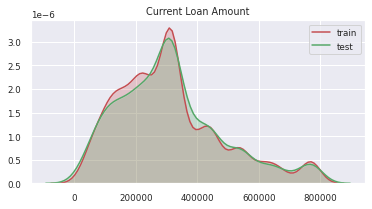

Current Credit Balance
MannwhitneyuResult(statistic=9334050.0, pvalue=0.3716147491364306)


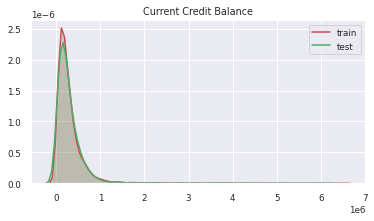

Monthly Debt
MannwhitneyuResult(statistic=9288187.0, pvalue=0.24369523330673137)


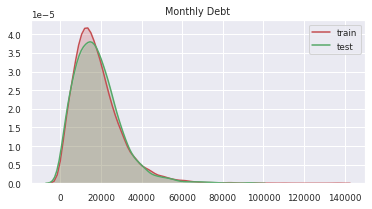

Credit Score
MannwhitneyuResult(statistic=9215474.5, pvalue=0.09971750703892313)


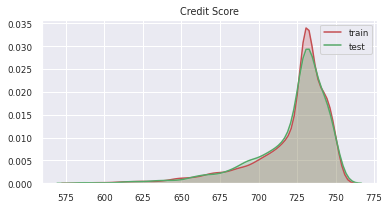

In [66]:
figsize = (6, 3)
for col in num_features:
    plt.figure(figsize=figsize)
    sns.set(font_scale=0.8)
    sns.kdeplot(df_train[col], shade=True, label='train', color='r')
    sns.kdeplot(df_test[col], shade=True, label='test', color='g')
    print(col)
    print(mannwhitneyu(df_train[col], df_test[col]))
    plt.title(col)
    plt.show()

#### Распределения выглядят похоже, pvalue это показывает.

## <a id='trusted'>**7. Доверительные интервалы**</a>

In [67]:
credit_score = 'Credit Score'

credit_score_with_target = df_train[[credit_score, target_name]]
creditscore = credit_score_with_target[credit_score]
creditscore_0 = creditscore[credit_score_with_target[target_name] == 0]
creditscore_1 = creditscore[credit_score_with_target[target_name] == 1]

In [68]:
mannwhitneyu(creditscore_0, creditscore_1)

MannwhitneyuResult(statistic=4433033.5, pvalue=3.643759132500934e-51)

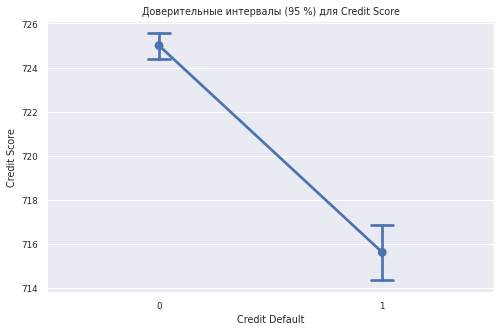

In [69]:
plt.figure(figsize=(8, 5))

sns.pointplot(x=target_name, y=credit_score, data=credit_score_with_target, capsize=.1)

plt.title(f'Доверительные интервалы (95 %) для {credit_score}')
plt.show()

In [70]:
annual_income = 'Annual Income'

annual_income_with_target = df_train[[annual_income, target_name]]
annualincome = annual_income_with_target[annual_income]
annualincome_0 = annualincome[annual_income_with_target[target_name] == 0]
annualincome_1 = annualincome[annual_income_with_target[target_name] == 1]

In [71]:
mannwhitneyu(annualincome_0, annualincome_1)

MannwhitneyuResult(statistic=4984463.5, pvalue=1.9106692844414513e-17)

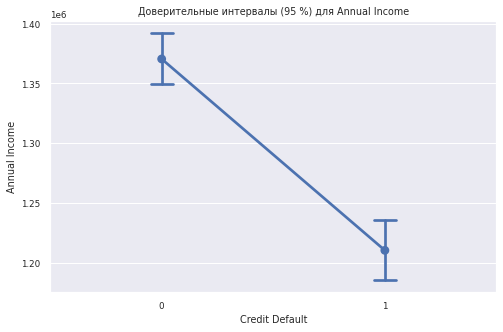

In [72]:
plt.figure(figsize=(8, 5))

sns.pointplot(x=target_name, y=annual_income, data=annual_income_with_target, capsize=.1)

plt.title(f'Доверительные интервалы (95 %) для {annual_income}')
plt.show()

## <a id='teach_model'>**8. Обучение и сохранение модели**</a>

In [73]:
for feature in cb_features:
    df_train[feature] = df_train[feature].astype(int)
    df_test[feature] = df_test[feature].astype(int)

X = df_train[cb_features]
y = df_train[target_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True,
                                                   test_size=0.3,
                                                   random_state=42,
                                                   stratify=y)

In [74]:
disbalance = y_train.value_counts()[0] / y_train.value_counts()[1]
disbalance

2.5496957403651117

In [75]:
frozen_params = {
     'class_weights':[1, disbalance], 
     'silent':True,
     'random_state':21,
     'cat_features':cat_features,
     'eval_metric':'F1',
     'early_stopping_rounds':20
}

In [76]:
%%time

model_catb = catb.CatBoostClassifier(**frozen_params, iterations=300, max_depth=5, 
                                     reg_lambda=0.93
                                    )
model_catb.fit(X_train, y_train, plot=True, eval_set=(X_test, y_test))

evaluate_preds(model_catb, X_train, X_test, y_train, y_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

TRAIN

              precision    recall  f1-score   support

           0       0.85      0.58      0.69      3771
           1       0.41      0.73      0.52      1479

    accuracy                           0.62      5250
   macro avg       0.63      0.66      0.61      5250
weighted avg       0.72      0.62      0.64      5250

TEST

              precision    recall  f1-score   support

           0       0.85      0.58      0.69      1616
           1       0.41      0.74      0.53       634

    accuracy                           0.62      2250
   macro avg       0.63      0.66      0.61      2250
weighted avg       0.73      0.62      0.64      2250

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               935  681
1               165  469
CPU times: user 3.5 s, sys: 286 ms, total: 3.79 s
Wall time: 1.77 s


In [77]:
with open(Path.cwd()/'final_model.pkl', 'wb') as file:
    pickle.dump(model_catb, file)